### Haberman's cancer  Survival Data Set 
* Contains cases from a study at the University of Chicago's Billings Hospital on the survival of patients who had   undergone surgery for breast cancer.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df_haberman=pd.read_csv("/Users/shashidharpattar/Downloads/haberman.csv")
df_haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Statistical Analysis

In [2]:
print(df_haberman.shape)

(306, 4)


In [3]:
df_haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
print(df_haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
df_haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [6]:
df_haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observations

* Dataset consist of 306 datapoints.
* It is an imbalanced data set.
* patient survived is large in number compared to patient died.


###  Performing Univariate analysis - Plotting PDF, CDF, Boxplot, Voilin plots


## Histogram.

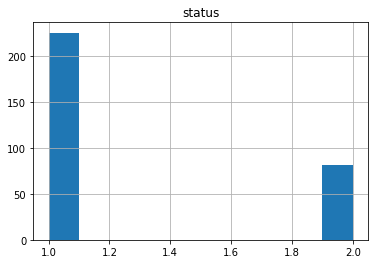

In [7]:
df_haberman.hist(column="status")
plt.show()

### Observations

* dataset is imbalance,survived patients(1) are more than that of died patients(2).

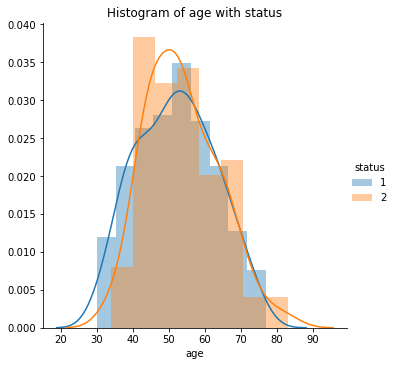

In [8]:
sns.FacetGrid(df_haberman, hue="status", height= 5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of age with status')
plt.show();

### Observations

* age feature shows a overlap between two classes.
* patients of age between 50 to 60 has been operated most.


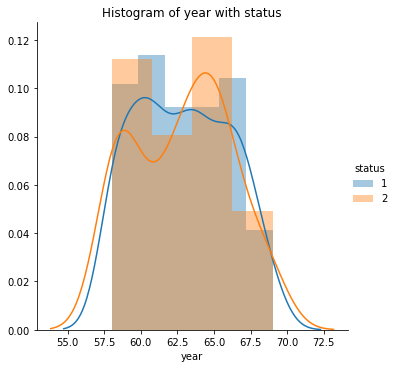

In [9]:
sns.FacetGrid(df_haberman, hue="status", height= 5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram of year with status')
plt.show();

### Observations

* operated year feature is not important.

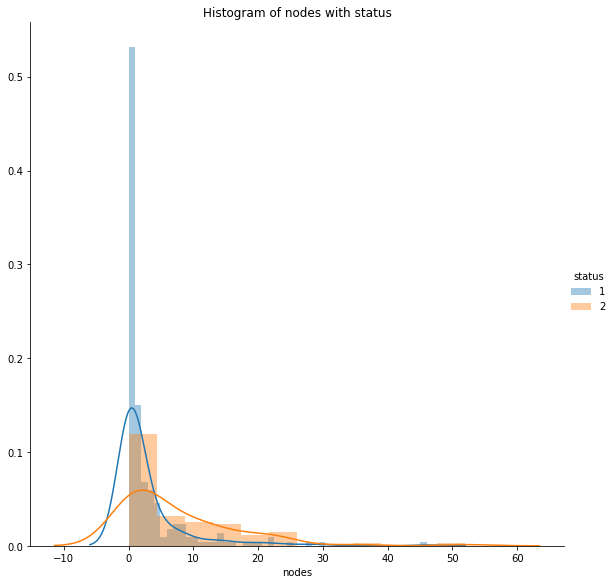

In [10]:
sns.FacetGrid(df_haberman, hue="status", height= 8) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram of nodes with status')
plt.show();

### Observations

* number of patients died is more compared to survived if number of axillary nodes is greater than 5.

## PDF And CDF

[0.70915033 0.08496732 0.0751634  0.03594771 0.02941176 0.01960784
 0.02614379 0.00326797 0.00653595 0.         0.00326797 0.
 0.         0.00326797 0.00326797]
[ 0.          3.46666667  6.93333333 10.4        13.86666667 17.33333333
 20.8        24.26666667 27.73333333 31.2        34.66666667 38.13333333
 41.6        45.06666667 48.53333333 52.        ]


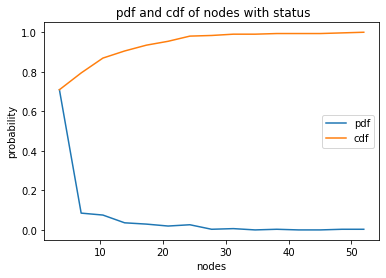

In [11]:
counts, bin_edges = np.histogram(df_haberman["nodes"], bins=15, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf");
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.title(" pdf and cdf of nodes with status")
plt.xlabel("nodes")
plt.ylabel("probability")
plt.legend()
plt.show();



### Observations

* 85percent of patients have nodes less than 10.

[0.79111111 0.07111111 0.05333333 0.01777778 0.02222222 0.00888889
 0.00888889 0.00888889 0.00444444 0.00888889 0.         0.
 0.         0.         0.00444444]
[ 0.          3.06666667  6.13333333  9.2        12.26666667 15.33333333
 18.4        21.46666667 24.53333333 27.6        30.66666667 33.73333333
 36.8        39.86666667 42.93333333 46.        ]


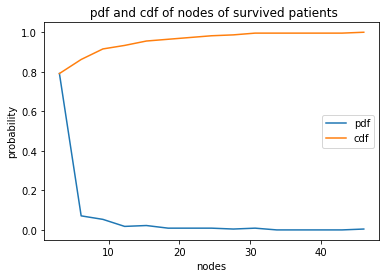

In [12]:
counts, bin_edges = np.histogram((df_haberman[df_haberman.status==1]).nodes, bins=15, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf")
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.title(" pdf and cdf of nodes of survived patients")
plt.xlabel("nodes")
plt.ylabel("probability")
plt.legend()
plt.show();

### Observations

* 90 percent of the survived patients have  positive axillary node less than 10.
* 80 percent of the survived patients have  positive axillary node equal to 3.

[0.48148148 0.12345679 0.11111111 0.09876543 0.04938272 0.03703704
 0.07407407 0.         0.         0.         0.01234568 0.
 0.         0.         0.01234568]
[ 0.          3.46666667  6.93333333 10.4        13.86666667 17.33333333
 20.8        24.26666667 27.73333333 31.2        34.66666667 38.13333333
 41.6        45.06666667 48.53333333 52.        ]


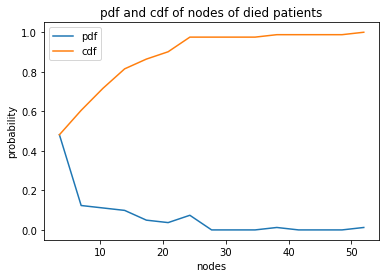

In [13]:
counts, bin_edges = np.histogram((df_haberman[df_haberman.status==2]).nodes, bins=15, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf")
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.title("pdf and cdf of nodes of died patients")
plt.xlabel("nodes")
plt.ylabel("probability")
plt.legend()
plt.show();

### Observations

* 30 percent of patients who are not survived have positive axillary node greater than 10.
* 70 percent of patients who are not survived have 0 to 10 nodes.

## Box Plot

<AxesSubplot:title={'center':'Box Plot (status vs nodes)'}, xlabel='status', ylabel='nodes'>

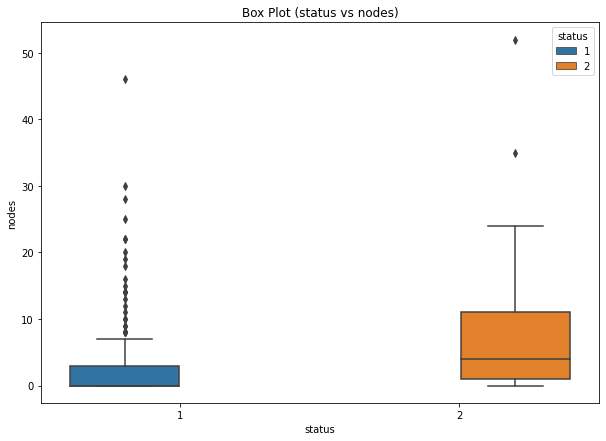

In [14]:
plt.figure(figsize=(10,7))
plt.title("Box Plot (status vs nodes)")
sns.boxplot(data=df_haberman,x='status',y='nodes',hue='status')

### Observations

* we can distinguish between survived and not survived patients based on number of positive axillary nodes

## Violin Plot

<AxesSubplot:title={'center':'Violin Plot (status vs nodes)'}, xlabel='status', ylabel='nodes'>

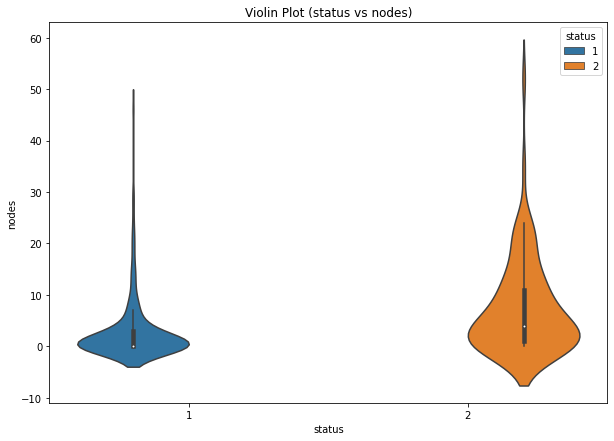

In [15]:
plt.figure(figsize=(10,7))
plt.title("Violin Plot (status vs nodes)")
sns.violinplot(data=df_haberman,x='status',y='nodes',hue='status')

### Observations

* survived patients have very less number of nodes and very less survived patients have nodes greater than 10.
* patients who did not survived have more number of nodes.

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots


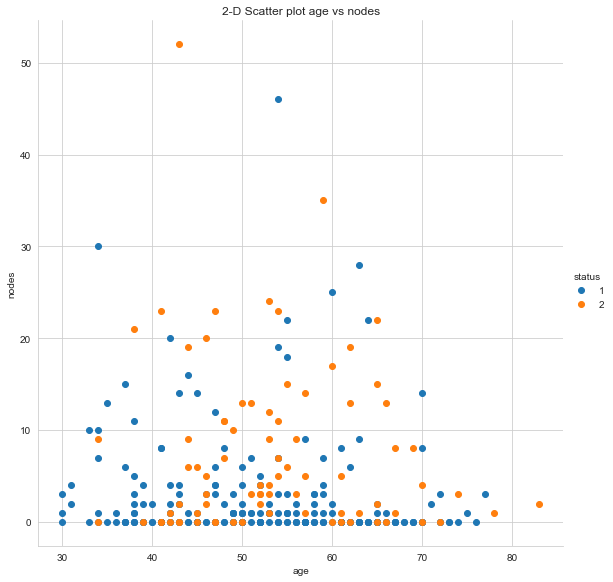

In [16]:
sns.set_style("whitegrid");
sns.FacetGrid(df_haberman, hue="status", height=8) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('2-D Scatter plot age vs nodes')
plt.show();



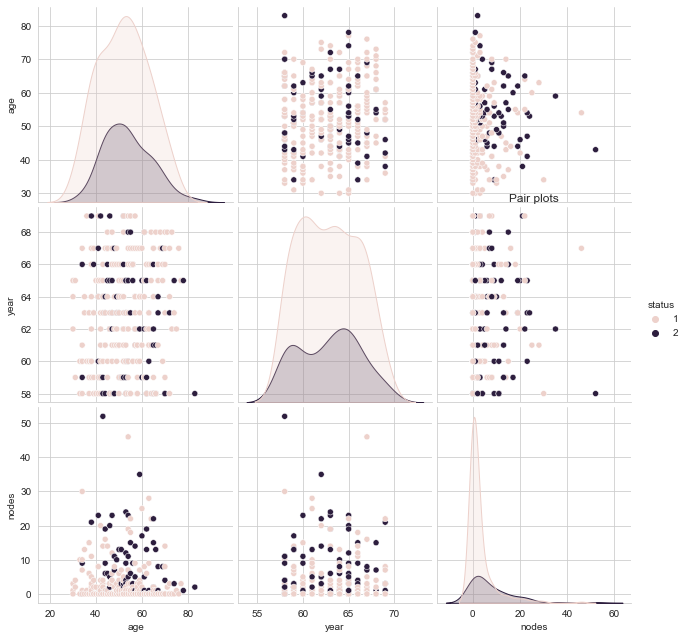

In [17]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df_haberman, hue="status", height=3);
plt.title('Pair plots')
plt.show()

### Observations

* class labels are overlapping for all the features hence they are non seperable.
* From above plot we are not getting any useful information.

## Overall Conclusions

* The most important feature is positive axillary nodes.
* if number of positive axillary nodes is greater than 10 then the probability of patient dying is high.
* 30 percent of died patients have positive axillary node greater than 10.
* age feature is overlapping for the two class hence cannot make conclusions with age feature.
* we need more features for classification.
* Age and Year features are not very useful for classification.